# 1. Explore waveforms

This notebook is used to explore the database and to get a feeling for the data. It allows to learn the available data, and some basic statistics. Prior to this notebook, the database has to be created. This is done with the command

In [1]:
%matplotlib ipympl

import matplotlib.pyplot as plt
import numpy as np

from scripts_py import loader

# import os
# duration = 0.5  # seconds
# freq = 440  # Hz
# os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

Loading model and data
Downsampling the data by 2
New sampling rate: 2.5 MHz
Done !


In [2]:
loader.stream

1 Trace(s) in Stream:
AE_stream.Galling..Ch3 | 2025-04-08T10:49:25.000000Z - 2025-04-08T10:49:37.006195Z | 2500000.0 Hz, 30015488 samples

## Configuration

The following cell will load the database, following the instructions in the configuration file. Please have a look at the database.py module to get help on the Database class.

In [5]:
# loader.stream.plot()
downsampling_f = 2
sampling_freq = 2.5e6

X = loader.stream[0].data
print(len(X))
print(len(X)/sampling_freq)

X = X[0:20000000000000:downsampling_f]

30015488
12.0061952


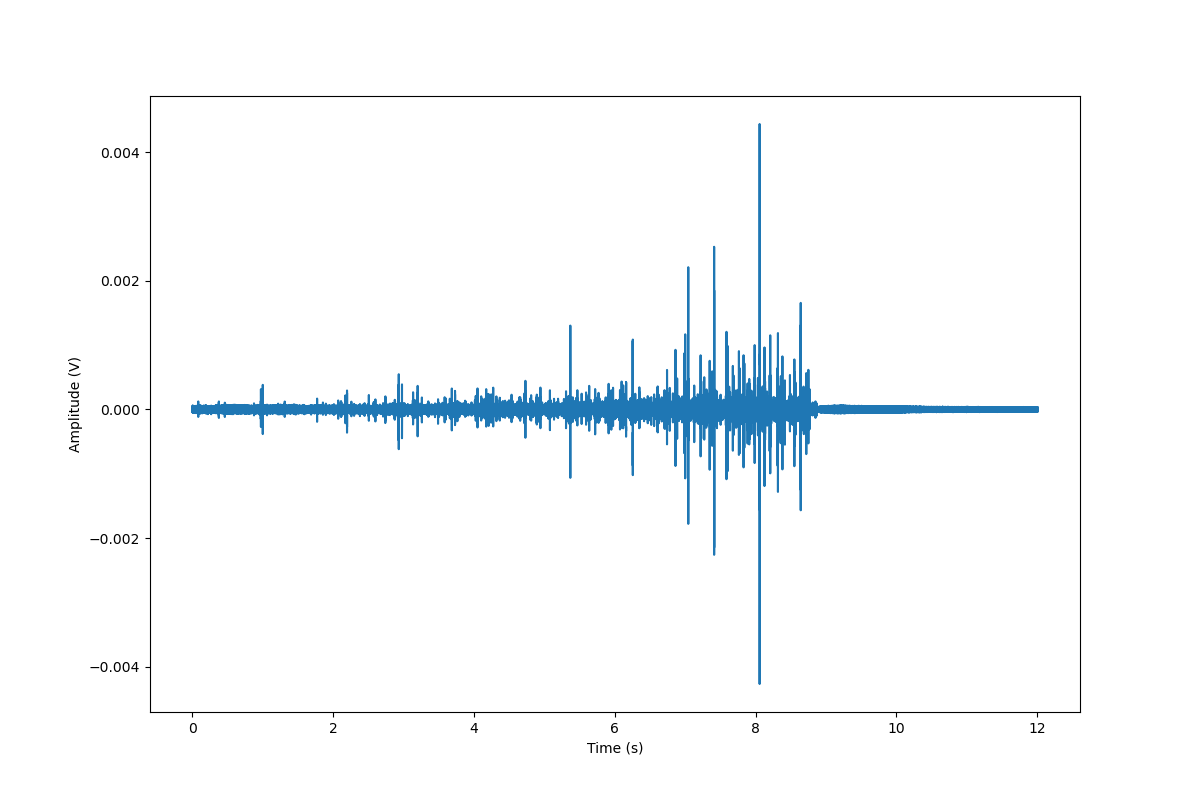

In [6]:
time = np.arange(len(X)) / sampling_freq * downsampling_f

fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(time,X)
# plt.xlim(37.5,40)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.show()

## Conversion volts -> dB

In [8]:
Volts = 0.007
np.log10(Volts/(1e-6))*20-40

36.901960800285138

In [9]:
(1/np.pi*(37.5/300)**2)*1e3

4.97359197162173

## Hits par threshold

In [5]:
X = loader.stream[0].data
len([1 for i in X if i > 0.5])

234